# Lab 3.2

## 1. & 2.

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [84]:
df=pd.read_excel("AirQualityUCI.xlsx")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## 3.

In [87]:
print(f"Shape of the Dataset: {df.shape}")

Shape of the Dataset: (9357, 15)


## 4.

In [90]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

## 5.

In [100]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [102]:
df.dropna(inplace=True)

## 6.

In [105]:
X=df[["RH"]]
Y=df["AH"] 

## 7.

In [108]:
# a) 70:30 split
X_train_70, X_test_70, Y_train_70, Y_test_70=train_test_split(X, Y, test_size=0.3, random_state=42)

# b) 80:20 split
X_train_80, X_test_80, Y_train_80, Y_test_80=train_test_split(X, Y, test_size=0.2, random_state=42)

## 8.

In [111]:
lr_70=LinearRegression()
lr_80=LinearRegression()

In [114]:
lr_70.fit(X_train_70, Y_train_70)
lr_80.fit(X_train_80, Y_train_80)

LinearRegression()

## 9.

In [117]:
print("For 70:30 split: ")
print(f"Coefficient (m): {lr_70.coef_[0]}")
print(f"Intercept (c): {lr_70.intercept_}")

print("For 80:20 split: ")
print(f"Coefficient (m): {lr_80.coef_[0]}")
print(f"Intercept (c): {lr_80.intercept_}")

For 70:30 split: 
Coefficient (m): 0.7178639350267222
Intercept (c): -35.350148024127925
For 80:20 split: 
Coefficient (m): 0.7184012846911462
Intercept (c): -35.311816141332905


## 10.

In [120]:
print("Equation for 70:30 split: Y={:.2f}*X + {:.2f}".format(lr_70.coef_[0], lr_70.intercept_))
print("Equation for 80:20 split: Y={:.2f}*X + {:.2f}".format(lr_80.coef_[0], lr_80.intercept_))

Equation for 70:30 split: Y=0.72*X + -35.35
Equation for 80:20 split: Y=0.72*X + -35.31


## 11.

In [123]:
Y_pred_70=lr_70.predict(X_test_70)
Y_pred_80=lr_80.predict(X_test_80)

## 12.

In [126]:
mse_70=mean_squared_error(Y_test_70, Y_pred_70)
r2_70=r2_score(Y_test_70, Y_pred_70)
print(f"70:30 Split - Mean Squared Error: {mse_70}, R2 Score: {r2_70}")

70:30 Split - Mean Squared Error: 166.48303239690537, R2 Score: 0.8905523325082786


## 13.

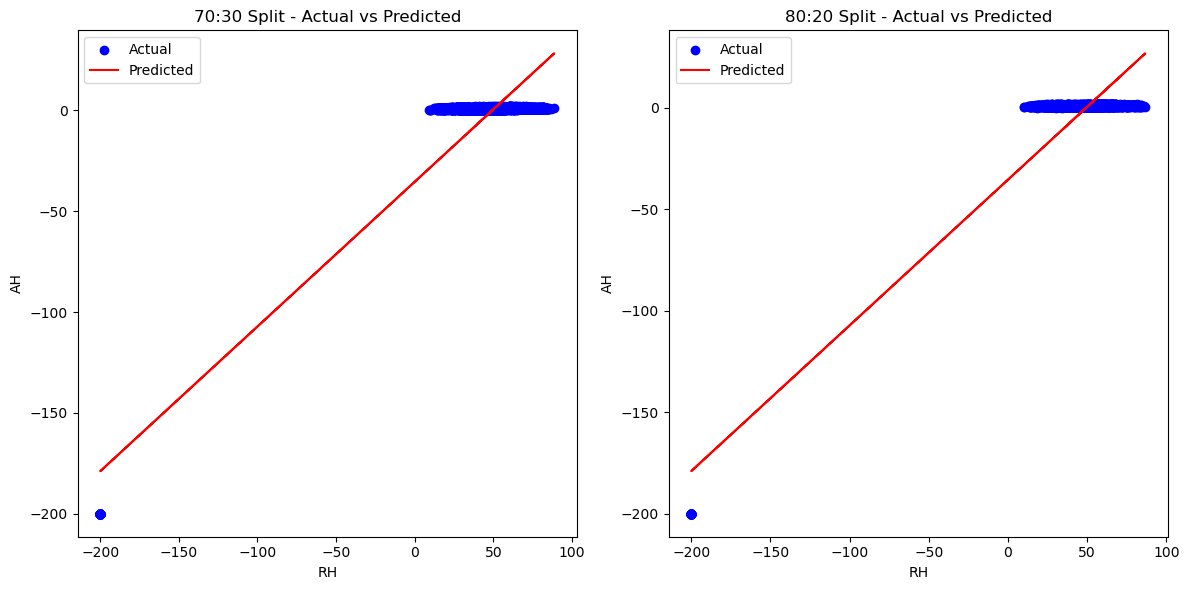

In [129]:
plt.figure(figsize=(12, 6))

# For 70:30 split
plt.subplot(1, 2, 1)
plt.scatter(X_test_70, Y_test_70, color="blue", label="Actual")
plt.plot(X_test_70, Y_pred_70, color="red", label="Predicted")
plt.title("70:30 Split - Actual vs Predicted")
plt.xlabel("RH")
plt.ylabel("AH")
plt.legend()

# For 80:20 split
plt.subplot(1, 2, 2)
plt.scatter(X_test_80, Y_test_80, color="blue", label="Actual")
plt.plot(X_test_80, Y_pred_80, color="red", label="Predicted")
plt.title("80:20 Split - Actual vs Predicted")
plt.xlabel("RH")
plt.ylabel("AH")
plt.legend()

plt.tight_layout()
plt.show()

## 14.

In [132]:
features=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH']

for feature in features:
    X=df[[feature]]
    Y=df['AH']
    
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    
    Y_pred=lr.predict(X_test)
    
    mse=mean_squared_error(Y_test, Y_pred)
    r2=r2_score(Y_test, Y_pred)
    
    print(f"Feature: {feature}")
    print(f"Mean Squared Error: {mse}, R2 Score: {r2}")
    print(f"Equation: Y = {lr.coef_[0]}*{feature} + {lr.intercept_}\n")

Feature: CO(GT)
Mean Squared Error: 1517.1718192502872, R2 Score: 0.002595553370025372
Equation: Y = -0.02162631267620268*CO(GT) + -7.585060415742737

Feature: PT08.S1(CO)
Mean Squared Error: 641.506206213912, R2 Score: 0.5782671847051181
Equation: Y = 0.09097473430697094*PT08.S1(CO) + -102.07866008535166

Feature: C6H6(GT)
Mean Squared Error: 49.431307005256166, R2 Score: 0.9675033474889237
Equation: Y = 0.9285973307938818*C6H6(GT) + -8.475130717290526

Feature: PT08.S2(NMHC)
Mean Squared Error: 894.2234612245015, R2 Score: 0.4121282473155219
Equation: Y = 0.07427112266862475*PT08.S2(NMHC) + -73.02164386739412

Feature: NOx(GT)
Mean Squared Error: 1501.661905287509, R2 Score: 0.012791931233784859
Equation: Y = -0.013127475168769586*NOx(GT) + -4.630503917024853

Feature: PT08.S3(NOx)
Mean Squared Error: 929.3479960788708, R2 Score: 0.3890370147965385
Equation: Y = 0.07494392792174787*PT08.S3(NOx) + -66.47043681503278

Feature: NO2(GT)
Mean Squared Error: 1514.5157960147333, R2 Score: 0